In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


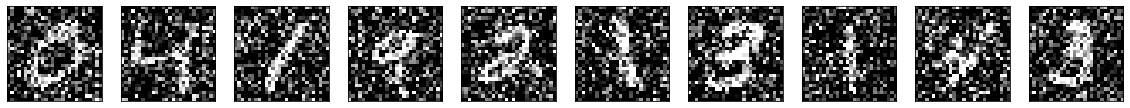

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
autoencoder.fit(x_train_noisy, x_train,  epochs=100,  batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 128s 2ms/step - loss: 0.1633 - val_loss: 0.1159
Epoch 2/100
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1133 - val_loss: 0.1087
Epoch 3/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1080 - val_loss: 0.1051
Epoch 4/100
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1048 - val_loss: 0.1028
Epoch 5/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1028 - val_loss: 0.1013
Epoch 6/100
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1014 - val_loss: 0.1000
Epoch 7/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1004 - val_loss: 0.0992
Epoch 8/100
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0995 - val_loss: 0.0985
Epoch 9/100
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0988 - val

Epoch 75/100
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0931 - val_loss: 0.0935
Epoch 76/100
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0931 - val_loss: 0.0932
Epoch 77/100
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0931 - val_loss: 0.0933
Epoch 78/100
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0931 - val_loss: 0.0932
Epoch 79/100
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0931 - val_loss: 0.0933
Epoch 80/100
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0931 - val_loss: 0.0935
Epoch 81/100
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0931 - val_loss: 0.0932
Epoch 82/100
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0930 - val_loss: 0.0934
Epoch 83/100
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0930 - val_loss: 0.0935
Epoch 84/100
60000/60000 [==

In [9]:
decoded_imgs = autoencoder.predict(x_test_noisy)

First row is orignal images


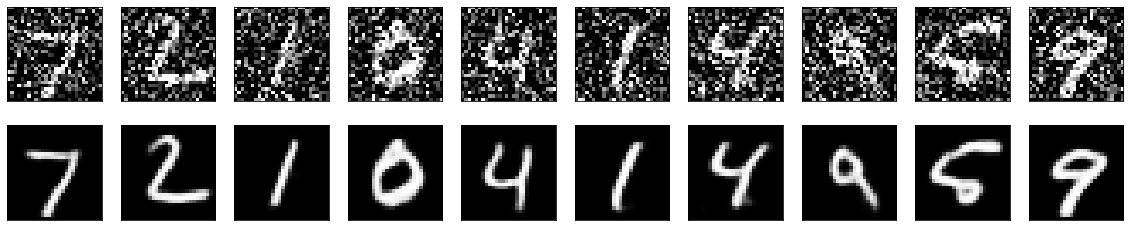

Second row is reconstrcuted images


In [10]:
import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')